In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
#load in the dataset
crime_df = pd.read_csv('maryland_violent_crime.csv')

In [8]:
#drop rows that aren't needed
crime_df = crime_df.drop(columns={"VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE", 
                                  "PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE", "POPULATION", "MURDER", "RAPE", "ROBBERY", "AGG. ASSAULT", "B & E", "LARCENY THEFT", "M/V THEFT", "GRAND TOTAL", "PERCENT CHANGE", "VIOLENT CRIME TOTAL", "VIOLENT CRIME PERCENT", "VIOLENT CRIME PERCENT CHANGE", "PROPERTY CRIME TOTALS", "PROPERTY CRIME PERCENT", "PROPERTY CRIME PERCENT CHANGE", "OVERALL PERCENT CHANGE PER 100,000 PEOPLE"})

In [9]:
#rename rows to make them more useable
crime_df = crime_df.rename(columns = {'COUNTY': 'name', 'OVERALL CRIME RATE PER 100,000 PEOPLE': 'overall_per_100k', 'VIOLENT CRIME RATE PER 100,000 PEOPLE': 'violent_per_100k', 'PROPERTY CRIME RATE PER 100,000 PEOPLE': 'property_per_100k', 'MURDER PER 100,000 PEOPLE': 'murder_per_100k', 'RAPE PER 100,000 PEOPLE': 'rape_per_100k', 'ROBBERY PER 100,000 PEOPLE': 'robbery_per_100k', 'AGG. ASSAULT PER 100,000 PEOPLE': 'assault_per_100k', 'B & E PER 100,000 PEOPLE': 'b&e_per_100k', 'LARCENY THEFT PER 100,000 PEOPLE': 'larceny_per_100k', 'M/V THEFT PER 100,000 PEOPLE': 'm/v_per_100k'})

In [10]:
#find data for past the year 2010
crime_df = crime_df[crime_df['YEAR'] >= 2010]

In [11]:
#group by county and find the mean of all of the values
grouped_crime_df = crime_df.groupby('name').mean()

In [12]:
grouped_crime_df

,YEAR,overall_per_100k,violent_per_100k,property_per_100k,murder_per_100k,rape_per_100k,robbery_per_100k,assault_per_100k,b&e_per_100k,larceny_per_100k,m/v_per_100k
name,,,,,,,,,,,
Allegany,2014.750000,1755.810000,186.628333,1569.180000,0.896667,14.695000,40.803333,130.226667,354.180000,1183.310000,31.693333
Anne Arundel,2015.000000,3051.618182,541.372727,2510.263636,9.545455,29.281818,164.427273,338.118182,417.809091,1925.263636,167.209091
Baltimore City,2015.000000,6219.018182,1611.554545,4607.445455,45.454545,50.881818,692.272727,822.936364,1135.781818,2749.345455,722.336364
Calvert,2015.000000,2064.559091,189.113636,1875.454545,0.000000,13.995455,44.718182,130.413636,312.568182,1487.368182,75.518182
Caroline,2014.132530,2287.662651,304.714458,1982.953012,2.236145,15.145783,54.800000,232.531325,425.585542,1496.181928,61.179518
Carroll,2015.000000,1698.577011,251.700000,1447.126136,0.693182,19.387500,33.169318,198.459091,287.856818,1114.281818,44.979545
Cecil,2015.000000,2520.962500,333.217045,2187.748864,4.262500,14.593182,87.092045,227.268182,419.227273,1676.315909,92.206818
Charles,2015.000000,3045.227273,561.859091,2483.359091,3.350000,35.604545,123.159091,399.722727,375.731818,2006.018182,101.622727
Dorchester,2014.250000,2348.213462,308.846154,2039.378846,2.807692,18.413462,56.134615,231.492308,467.640385,1485.513462,86.223077


In [13]:
#read in the geojson
md_geojson = gpd.read_file('maryland_counties.geojson')

In [14]:
print(md_geojson)

               name                                           geometry
0          Allegany  POLYGON ((-78.72248 39.72294, -78.34273 39.722...
1      Anne Arundel  MULTIPOLYGON (((-76.60503 39.22823, -76.58284 ...
2         Baltimore  POLYGON ((-76.60443 39.72118, -76.56945 39.721...
3    Baltimore City  POLYGON ((-76.52984 39.22748, -76.53010 39.209...
4           Calvert  MULTIPOLYGON (((-76.64344 38.76926, -76.63476 ...
5          Caroline  POLYGON ((-75.74802 39.14320, -75.70771 38.635...
6           Carroll  POLYGON ((-76.78818 39.72070, -76.87068 39.490...
7             Cecil  MULTIPOLYGON (((-75.84468 39.59343, -75.84467 ...
8           Charles  MULTIPOLYGON (((-77.14531 38.59470, -77.14600 ...
9        Dorchester  MULTIPOLYGON (((-76.24810 38.43828, -76.24698 ...
10        Frederick  POLYGON ((-77.21847 39.71986, -77.21472 39.717...
11          Garrett  POLYGON ((-78.97894 39.72274, -78.91403 39.722...
12          Harford  POLYGON ((-76.26955 39.33053, -76.26660 39.331...
13    

In [15]:
#merge the data so that the geojson column name is joined on the dataset column name, which are both for county
merged_data = md_geojson.merge(grouped_crime_df, on = 'name', how = 'left')

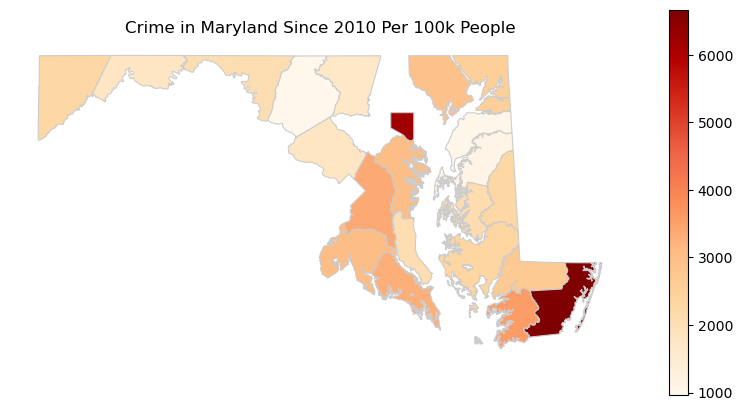

In [16]:
#create heatmap for overall crime in the state of maryland since the year 2010
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
merged_data.plot(column='overall_per_100k', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Heatmap of Maryland Counties')
plt.title('Crime in Maryland Since 2010 Per 100k People')
plt.axis('off')
ax.tick_params(labelsize = 8)
plt.show()

In [17]:
#get top 10 counties in overall crime and reset the index
top_ten_total = grouped_crime_df.nlargest(10, ['overall_per_100k'])
top_ten_total.reset_index(inplace=True)
top_ten_total

,name,YEAR,overall_per_100k,violent_per_100k,property_per_100k,murder_per_100k,rape_per_100k,robbery_per_100k,assault_per_100k,b&e_per_100k,larceny_per_100k,m/v_per_100k
0,Worcester,2015.000000,6671.440909,616.240909,6055.193182,4.440909,48.820455,112.604545,450.386364,957.786364,5005.945455,91.463636
1,Baltimore City,2015.000000,6219.018182,1611.554545,4607.445455,45.454545,50.881818,692.272727,822.936364,1135.781818,2749.345455,722.336364
2,Somerset,2015.000000,3581.431818,647.822727,2933.613636,7.840909,58.463636,135.822727,445.681818,725.186364,2155.663636,52.754545
3,Prince George's,2014.983108,3379.111149,493.319932,2885.788851,8.932095,16.575338,217.473649,250.336149,545.514865,1908.580743,431.693919
4,St. Mary's,2015.000000,3305.854545,299.990909,3005.854545,0.000000,27.363636,60.481818,212.154545,382.654545,2554.163636,69.036364
5,Anne Arundel,2015.000000,3051.618182,541.372727,2510.263636,9.545455,29.281818,164.427273,338.118182,417.809091,1925.263636,167.209091
6,Charles,2015.000000,3045.227273,561.859091,2483.359091,3.350000,35.604545,123.159091,399.722727,375.731818,2006.018182,101.622727
7,Harford,2015.000000,2908.169697,380.878788,2527.287879,2.239394,28.909091,105.836364,243.903030,325.684848,2124.036364,77.575758
8,Wicomico,2014.942529,2679.498851,299.312644,2380.186207,3.226437,12.870115,77.820690,205.394253,492.932184,1825.319540,61.931034
9,Cecil,2015.000000,2520.962500,333.217045,2187.748864,4.262500,14.593182,87.092045,227.268182,419.227273,1676.315909,92.206818


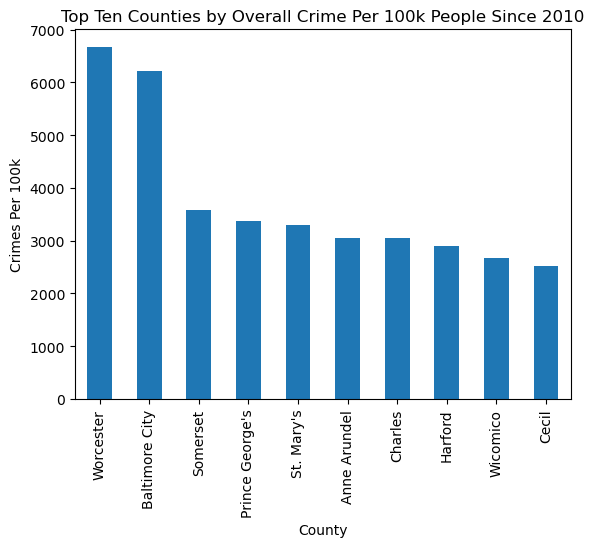

In [18]:
#bar plot of top 10 counties for overall crime. 
top_ten_total.plot(kind = 'bar', x = 'name', y = 'overall_per_100k', legend = False)
plt.title('Top Ten Counties by Overall Crime Per 100k People Since 2010')
plt.xlabel('County')
plt.ylabel('Crimes Per 100k')
plt.show()

In [19]:
#get top 10 counties in property crime and reset the index
top_ten_property = grouped_crime_df.nlargest(10, ['property_per_100k'])
top_ten_property.reset_index(inplace=True)
top_ten_property

,name,YEAR,overall_per_100k,violent_per_100k,property_per_100k,murder_per_100k,rape_per_100k,robbery_per_100k,assault_per_100k,b&e_per_100k,larceny_per_100k,m/v_per_100k
0,Worcester,2015.000000,6671.440909,616.240909,6055.193182,4.440909,48.820455,112.604545,450.386364,957.786364,5005.945455,91.463636
1,Baltimore City,2015.000000,6219.018182,1611.554545,4607.445455,45.454545,50.881818,692.272727,822.936364,1135.781818,2749.345455,722.336364
2,St. Mary's,2015.000000,3305.854545,299.990909,3005.854545,0.000000,27.363636,60.481818,212.154545,382.654545,2554.163636,69.036364
3,Somerset,2015.000000,3581.431818,647.822727,2933.613636,7.840909,58.463636,135.822727,445.681818,725.186364,2155.663636,52.754545
4,Prince George's,2014.983108,3379.111149,493.319932,2885.788851,8.932095,16.575338,217.473649,250.336149,545.514865,1908.580743,431.693919
5,Harford,2015.000000,2908.169697,380.878788,2527.287879,2.239394,28.909091,105.836364,243.903030,325.684848,2124.036364,77.575758
6,Anne Arundel,2015.000000,3051.618182,541.372727,2510.263636,9.545455,29.281818,164.427273,338.118182,417.809091,1925.263636,167.209091
7,Charles,2015.000000,3045.227273,561.859091,2483.359091,3.350000,35.604545,123.159091,399.722727,375.731818,2006.018182,101.622727
8,Wicomico,2014.942529,2679.498851,299.312644,2380.186207,3.226437,12.870115,77.820690,205.394253,492.932184,1825.319540,61.931034
9,Cecil,2015.000000,2520.962500,333.217045,2187.748864,4.262500,14.593182,87.092045,227.268182,419.227273,1676.315909,92.206818


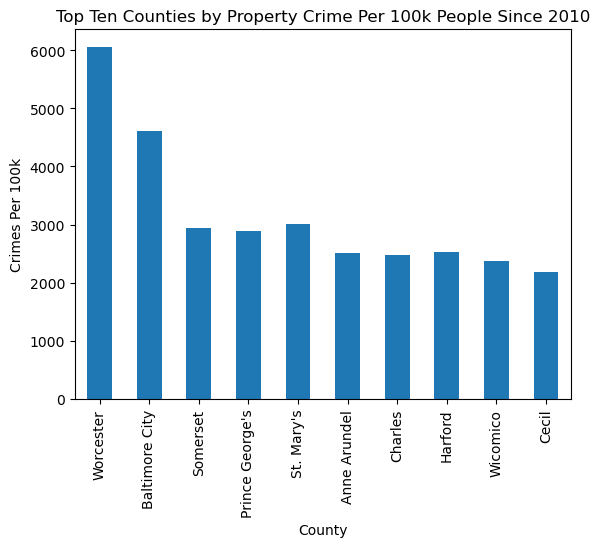

In [20]:
#bar plot of top 10 counties for property crime. 
top_ten_total.plot(kind = 'bar', x = 'name', y = 'property_per_100k', legend = False)
plt.title('Top Ten Counties by Property Crime Per 100k People Since 2010')
plt.xlabel('County')
plt.ylabel('Crimes Per 100k')
plt.show()

In [21]:
#get top 10 counties in larceny and reset the index
top_ten_larceny = grouped_crime_df.nlargest(10, ['larceny_per_100k'])
top_ten_larceny.reset_index(inplace=True)
top_ten_larceny

,name,YEAR,overall_per_100k,violent_per_100k,property_per_100k,murder_per_100k,rape_per_100k,robbery_per_100k,assault_per_100k,b&e_per_100k,larceny_per_100k,m/v_per_100k
0,Worcester,2015.000000,6671.440909,616.240909,6055.193182,4.440909,48.820455,112.604545,450.386364,957.786364,5005.945455,91.463636
1,Baltimore City,2015.000000,6219.018182,1611.554545,4607.445455,45.454545,50.881818,692.272727,822.936364,1135.781818,2749.345455,722.336364
2,St. Mary's,2015.000000,3305.854545,299.990909,3005.854545,0.000000,27.363636,60.481818,212.154545,382.654545,2554.163636,69.036364
3,Somerset,2015.000000,3581.431818,647.822727,2933.613636,7.840909,58.463636,135.822727,445.681818,725.186364,2155.663636,52.754545
4,Harford,2015.000000,2908.169697,380.878788,2527.287879,2.239394,28.909091,105.836364,243.903030,325.684848,2124.036364,77.575758
5,Charles,2015.000000,3045.227273,561.859091,2483.359091,3.350000,35.604545,123.159091,399.722727,375.731818,2006.018182,101.622727
6,Anne Arundel,2015.000000,3051.618182,541.372727,2510.263636,9.545455,29.281818,164.427273,338.118182,417.809091,1925.263636,167.209091
7,Prince George's,2014.983108,3379.111149,493.319932,2885.788851,8.932095,16.575338,217.473649,250.336149,545.514865,1908.580743,431.693919
8,Wicomico,2014.942529,2679.498851,299.312644,2380.186207,3.226437,12.870115,77.820690,205.394253,492.932184,1825.319540,61.931034
9,Cecil,2015.000000,2520.962500,333.217045,2187.748864,4.262500,14.593182,87.092045,227.268182,419.227273,1676.315909,92.206818


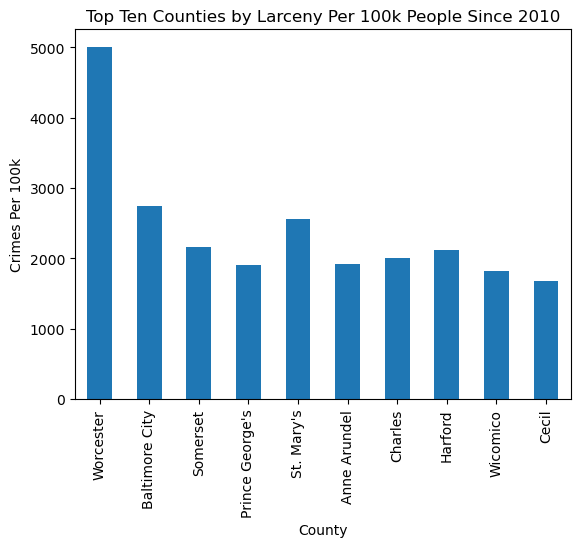

In [22]:
#bar plot of top 10 counties for property crime. 
top_ten_total.plot(kind = 'bar', x = 'name', y = 'larceny_per_100k', legend = False)
plt.title('Top Ten Counties by Larceny Per 100k People Since 2010')
plt.xlabel('County')
plt.ylabel('Crimes Per 100k')
plt.show()

In [23]:
#Where I got the geojson of maryland
#https://github.com/frankrowe/maryland-geojson/blob/master/maryland-counties.geojson

#Where I got the crime data
#https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-Municipality-2000-/2p5g-xrcb/about_data